In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
new_data=data.drop("country",axis=1)


In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit(new_data)
    sse.append(km.inertia_)

Text(0, 0.5, 'sse')

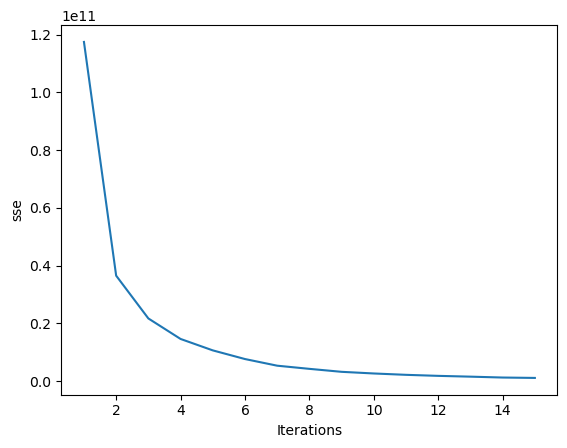

In [8]:
plt.plot(range(1,16),sse)
plt.xlabel("Iterations")
plt.ylabel("sse")

In [10]:
km_model=KMeans(n_clusters=4)
prediction=km_model.fit_predict(new_data)

In [11]:
prediction

array([2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 0, 0, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 3, 0, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2])

In [12]:
clustered_result=pd.DataFrame({"Country Name":data["country"],"Cluster":prediction})

In [13]:
clustered_result

,Country Name,Cluster
0,Afghanistan,2
1,Albania,2
2,Algeria,2
3,Angola,2
4,Antigua and Barbuda,0
...,...,...
162,Vanuatu,2
163,Venezuela,0
164,Vietnam,2
165,Yemen,2
